# Section 0: Load Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Section 1: Load and Explore Dataset

In [3]:
df = pd.read_csv('../Resources/bankchurn.csv')

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
#Drop columns not usable for ML
df.drop(labels = ['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

In [6]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [15]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [11]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [10]:
X[0]

array([619, 'France', 'Female', 42, 2, 0.0, 1, 1, 1, 101348.88],
      dtype=object)

In [12]:
y

array([1, 0, 1, ..., 1, 1, 0])

# Section 2: Encoding of Categorical Columns

In [13]:
#encoding the Gender column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:,2] = le.fit_transform(X[:,2])

In [14]:
X[0]

array([619, 'France', 0, 42, 2, 0.0, 1, 1, 1, 101348.88], dtype=object)

In [19]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [21]:
X[0]

array([1.0, 0.0, 0.0, 619, 0, 42, 2, 0.0, 1, 1, 1, 101348.88],
      dtype=object)

In [22]:
X[1]

array([0.0, 0.0, 1.0, 608, 0, 41, 1, 83807.86, 1, 0, 1, 112542.58],
      dtype=object)

In [24]:
X[7]

array([0.0, 1.0, 0.0, 376, 0, 29, 4, 115046.74, 4, 1, 0, 119346.88],
      dtype=object)

# Section 3: Train Test Split & Scaling

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
len(X_train)

8000

In [27]:
len(X_test)

2000

In [28]:
len(y_train)

8000

In [29]:
len(y_test)

2000

In [31]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [32]:
#Scaling the dataset
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [37]:
df.iloc[0]

CreditScore           619
Geography          France
Gender             Female
Age                    42
Tenure                  2
Balance                 0
NumOfProducts           1
HasCrCard               1
IsActiveMember          1
EstimatedSalary    101349
Exited                  1
Name: 0, dtype: object

In [35]:
X[0]

array([1.0, 0.0, 0.0, 619, 0, 42, 2, 0.0, 1, 1, 1, 101348.88],
      dtype=object)

In [34]:
X_train[0]

array([ 1.00150113, -0.57946723, -0.57638802,  0.35649971,  0.91324755,
       -0.6557859 ,  0.34567966, -1.21847056,  0.80843615,  0.64920267,
        0.97481699,  1.36766974])

# Section 4: K-NN Model

In [57]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 10, metric = 'minkowski', p = 1)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10, p=1)

In [58]:
y_pred = knn.predict(X_test)

In [59]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,y_pred)
cm

array([[1567,   40],
       [ 283,  110]])

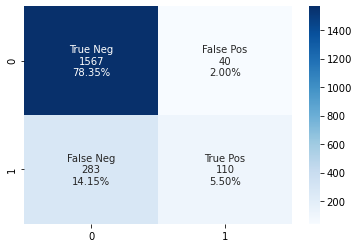

In [60]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

In [61]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91      1607
           1       0.73      0.28      0.41       393

    accuracy                           0.84      2000
   macro avg       0.79      0.63      0.66      2000
weighted avg       0.82      0.84      0.81      2000



# Section 5: SVM

In [78]:
from sklearn.svm import SVC 
svm = SVC(kernel='rbf')
svm.fit(X_train, y_train)

SVC()

In [79]:
y_pred = svm.predict(X_test)

In [80]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,y_pred)
cm

array([[1562,   45],
       [ 243,  150]])

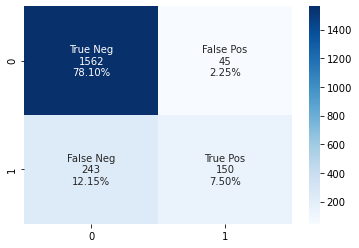

In [81]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

In [82]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1607
           1       0.77      0.38      0.51       393

    accuracy                           0.86      2000
   macro avg       0.82      0.68      0.71      2000
weighted avg       0.85      0.86      0.84      2000



# Section 6: Decision Tree

In [83]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [84]:
y_pred = dtc.predict(X_test)

In [85]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,y_pred)
cm

array([[1360,  247],
       [ 203,  190]])

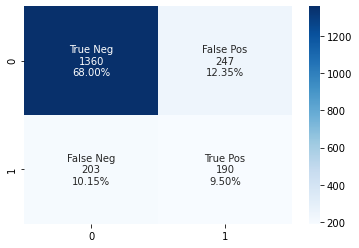

In [86]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

In [87]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86      1607
           1       0.43      0.48      0.46       393

    accuracy                           0.78      2000
   macro avg       0.65      0.66      0.66      2000
weighted avg       0.78      0.78      0.78      2000



[Text(660.5583135474058, 887.88, 'X[5] <= 0.533\ngini = 0.327\nsamples = 8000\nvalue = [6356, 1644]'),
 Text(515.7761046488673, 851.64, 'X[8] <= 1.671\ngini = 0.228\nsamples = 6130\nvalue = [5324, 806]'),
 Text(406.57459926702836, 815.4, 'X[8] <= -0.054\ngini = 0.204\nsamples = 5987\nvalue = [5296, 691]'),
 Text(276.45413792121127, 779.16, 'X[5] <= -0.038\ngini = 0.3\nsamples = 2952\nvalue = [2410, 542]'),
 Text(172.6481823643008, 742.92, 'X[1] <= 0.573\ngini = 0.236\nsamples = 2127\nvalue = [1837, 290]'),
 Text(96.64392102338152, 706.68, 'X[7] <= -0.073\ngini = 0.195\nsamples = 1617\nvalue = [1440, 177]'),
 Text(27.72204052584442, 670.44, 'X[5] <= -0.798\ngini = 0.336\nsamples = 422\nvalue = [332, 90]'),
 Text(20.346724667349026, 634.2, 'X[11] <= 1.687\ngini = 0.225\nsamples = 124\nvalue = [108, 16]'),
 Text(15.468270214943704, 597.96, 'X[5] <= -1.179\ngini = 0.205\nsamples = 121\nvalue = [107, 14]'),
 Text(8.567041965199591, 561.72, 'X[5] <= -1.939\ngini = 0.346\nsamples = 45\nvalue 

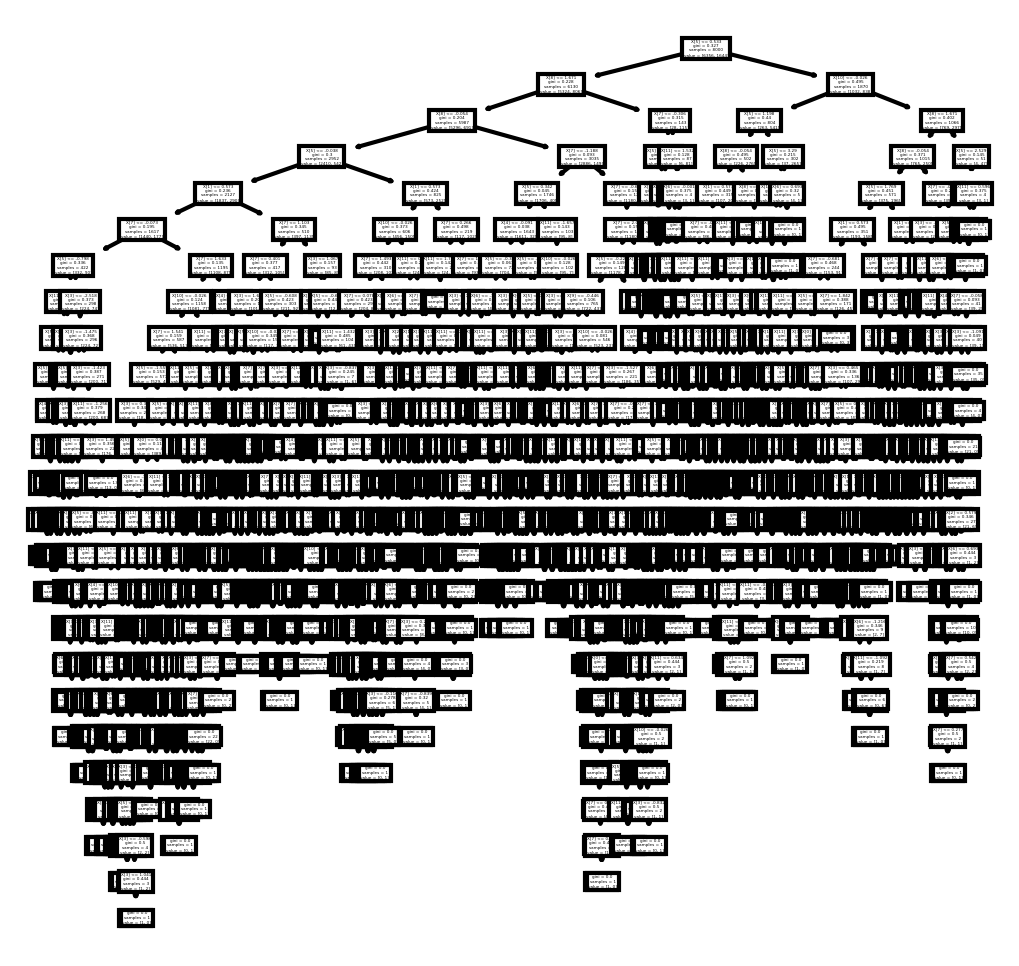

In [88]:
from sklearn import tree
fig, axes = plt.subplots(nrows=1,ncols=1,figsize=(4,4),dpi=300)
tree.plot_tree(dtc)

Feature: 0, Score: 0.00808
Feature: 1, Score: 0.02257
Feature: 2, Score: 0.00648
Feature: 3, Score: 0.12797
Feature: 4, Score: 0.01442
Feature: 5, Score: 0.21654
Feature: 6, Score: 0.07611
Feature: 7, Score: 0.16164
Feature: 8, Score: 0.11931
Feature: 9, Score: 0.01700
Feature: 10, Score: 0.07022
Feature: 11, Score: 0.15967


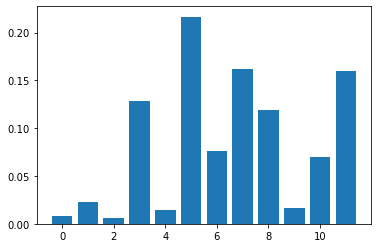

In [90]:
# get importance
importance = dtc.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [91]:
X[0]
# Feature 5: Age, Feature7: Number of Products, Feature 11: Salary, Feature 3: Credit Score 

array([1.0, 0.0, 0.0, 619, 0, 42, 2, 0.0, 1, 1, 1, 101348.88],
      dtype=object)